# MATPLOTLIB: DATA VISUALIZATION

Test Code By <a href="https://www.facebook.com/peny.ismail.77">Peny Ismail</a> - <a href="https://github.com/peny77">Github</a>

## Basic plots

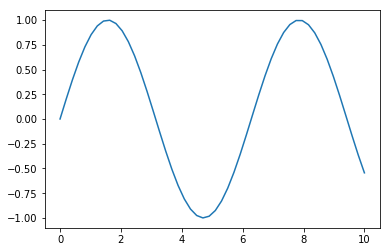

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(0, 10, 50)
sinus = np.sin(x)

plt.plot(x, sinus)
plt.show()

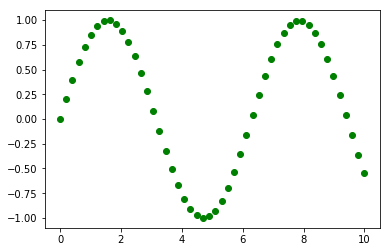

In [2]:
plt.plot(x, sinus, 'og') # 'x','o','p','s','b'
plt.show()

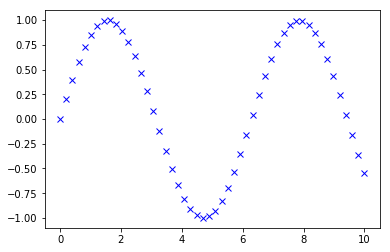

In [3]:
plt.plot(x, sinus, 'xb') # 'x','o','p','s','b'
plt.show()

> Rapid multiplot

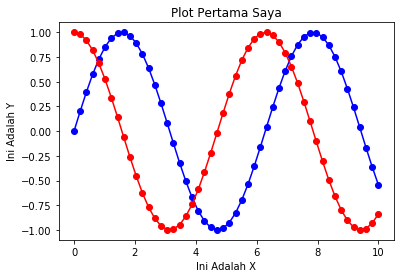

In [4]:
cosinus = np.cos(x)
plt.plot(x, sinus, '-b', x, sinus, 'ob', x, cosinus, '-r', x, cosinus, 'or')
plt.xlabel('Ini Adalah X')
plt.ylabel('Ini Adalah Y')
plt.title('Plot Pertama Saya')
plt.show()

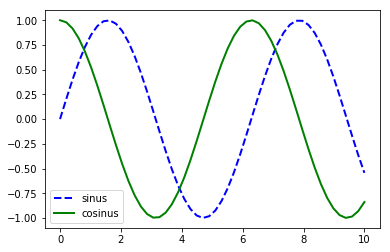

In [6]:
# step by step
plt.plot(x, sinus, label='sinus', color='blue', linestyle='--', linewidth='2')
plt.plot(x, cosinus, label='cosinus', color='green', linestyle='-', linewidth='2')
plt.legend()
plt.show()

## Scatter (2D) plots

In [7]:
import pandas as pd
try:
    salary = pd.read_csv('salary.csv')
except:
    url = 'https://raw.githubusercontent.com/peny77/Statistics-and-Machine-Learning-in-Python/master/salary_table.csv'
    salary = pd.read_csv(url)
    
df = salary
df.head()

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N


### Simple scatter with colors

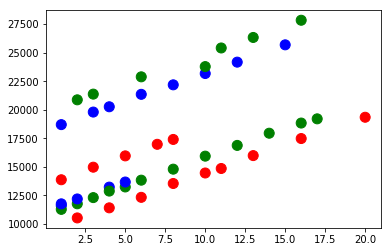

In [16]:
warna = warna_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: warna[x]), s=100)

### Scatter plot with colors and symbols

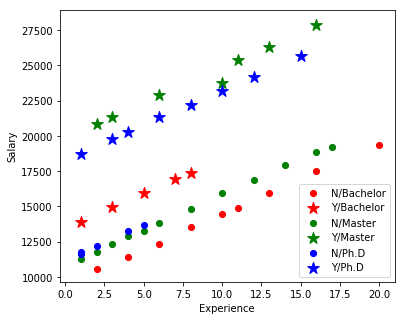

In [23]:
# Figure size
plt.figure(figsize=(6,5))

# Define colors / symbols manually
symbols_manag = dict(Y='*', N='.')
warna_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}

# group by education x management => 6 groups
for values, d in salary.groupby(['education','management']):
    warna, manager = values
    plt.scatter(d['experience'], d['salary'], marker=symbols_manag[manager], color=warna_edu[warna],
    s=150, label=manager+'/'+warna)
    
# set labels
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4) # lower right
plt.show()

## Saving Figures

> bitmap format

In [24]:
plt.plot(x, sinus)
plt.savefig('sinus.png')
plt.close()

> format (SVG: Scalable Vector Graphics)

In [25]:
plt.plot(x, cosinus)
plt.savefig('cosinus.svg')
plt.close()

> format PDF

In [26]:
plt.plot(x, sinus)
plt.savefig('sinus.pdf')
plt.close()

## Exploring data (with seaborn)

> Install using: pip install -U --user seaborn

### Boxplot

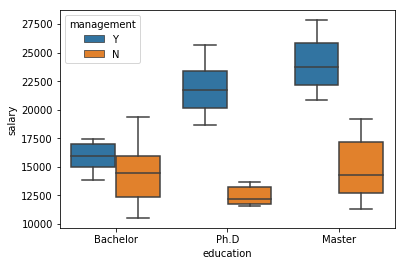

In [28]:
import seaborn as sns

sns.boxplot(x='education', y='salary', hue='management', data=salary)

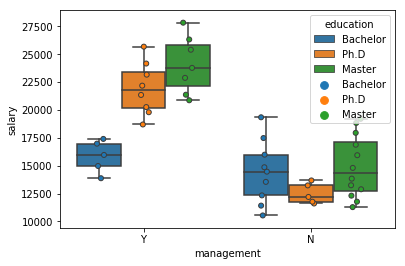

In [29]:
sns.boxplot(x='management', y='salary', hue='education', data=salary)
sns.stripplot(x='management', y='salary', hue='education', data=salary,
             jitter=True, dodge=True, linewidth=1)

# Jitter and split options separate datapoints according to group

## Density plot with one figure containing multiple axis

> Set up the matplotlib figure: 3 x 1 axis

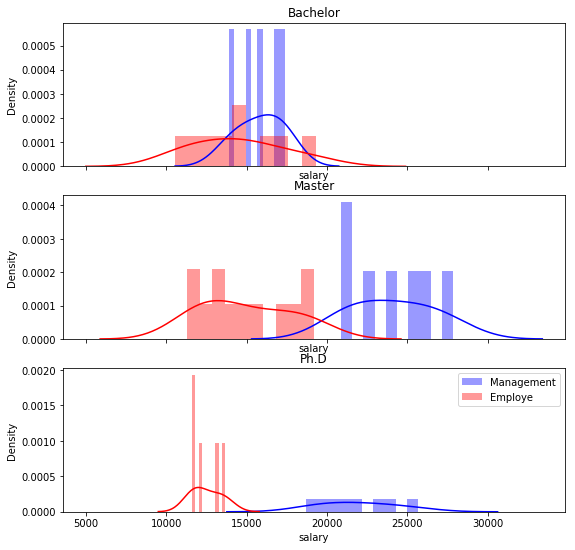

In [31]:
f, axes = plt.subplots(3, 1, figsize=(9, 9), sharex=True)

i = 0
for warna, d in salary.groupby(['education']):
    sns.distplot(d.salary[d.management == 'Y'], color='b', bins=10, label='Management',
                ax=axes[i])
    sns.distplot(d.salary[d.management == 'N'], color='r', bins=10, label='Employe',
                ax=axes[i])
    axes[i].set_title(warna)
    axes[i].set_ylabel('Density')
    i +=1
plt.legend()

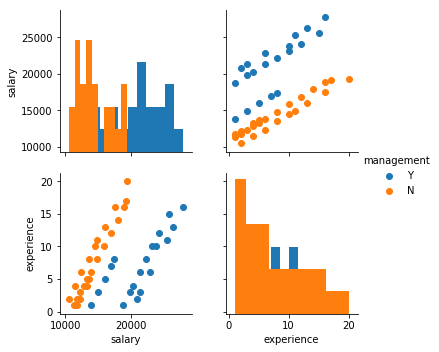

In [33]:
g = sns.PairGrid(salary, hue='management')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()